In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
%matplotlib inline
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import os

In [32]:
model = load_model('hesthemuffinmannnn.h5')

1/1 [==============================] - 0s 43ms/step


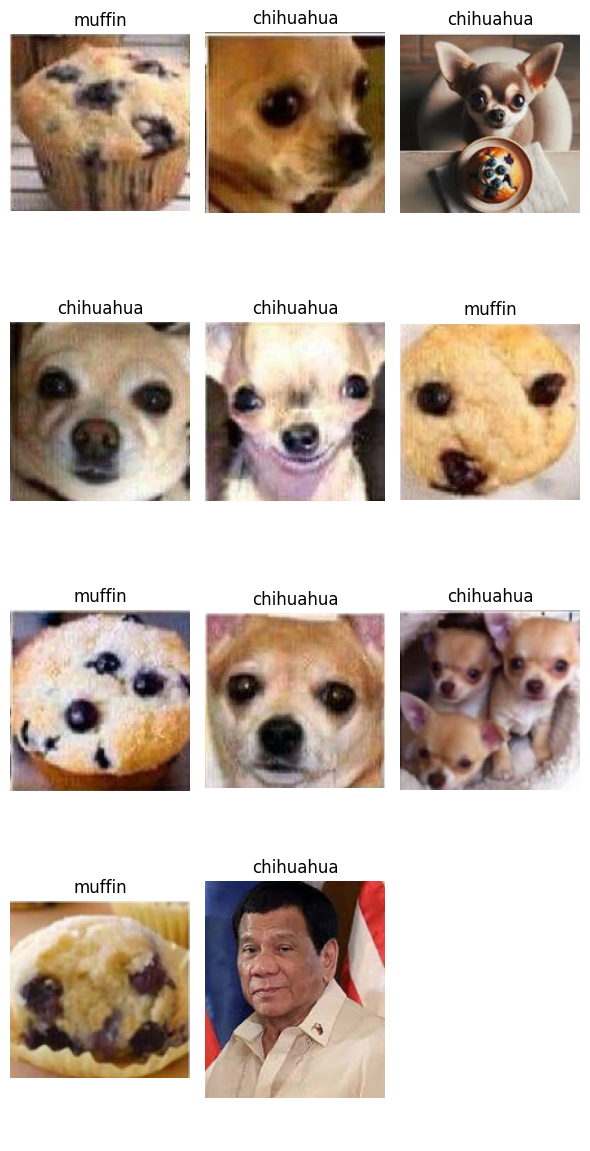

In [34]:
# Define the folder path and model
folder_path = 'Muffin_vs_chihua'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Calculate the number of rows and columns for the subplots
num_images = len(image_files)
cols = 3
rows = np.ceil(num_images / cols).astype(int)

# Create a figure for the subplots with a smaller figure size
fig, axes = plt.subplots(rows, cols, figsize=(6, 3 * rows))

# Iterate over the images and plot each one
for i, image_file in enumerate(image_files):
    # Read and preprocess the image
    image_path = os.path.join(folder_path, image_file)
    image_ontest = cv2.imread(image_path)
    image_ontest = cv2.cvtColor(image_ontest, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_ontest, (64, 64))
    image_resized = image_resized.reshape(1, 64, 64, 3)

    # Make a prediction
    result = model.predict(image_resized)
    if result[0][0] > 0.5:
        prediction = 'muffin'
    else:
        prediction = 'chihuahua'

    # Determine the subplot position
    row = i // cols
    col = i % cols

    # Display the image and set the title as the prediction
    axes[row, col].imshow(image_ontest)
    axes[row, col].set_title(prediction)
    axes[row, col].axis('off')

# Hide any empty subplots
for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('mvc.jpg')
plt.show()

1/1 [==============================] - 0s 206ms/step


C:\Users\Dabehkun\AppData\Local\Temp\ipykernel_44720\1875714064.py:31: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
C:\Users\Dabehkun\AppData\Local\Temp\ipykernel_44720\1875714064.py:34: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


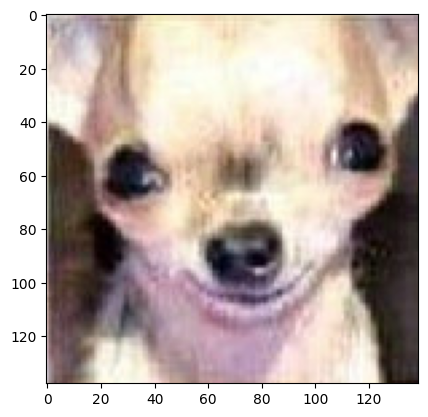

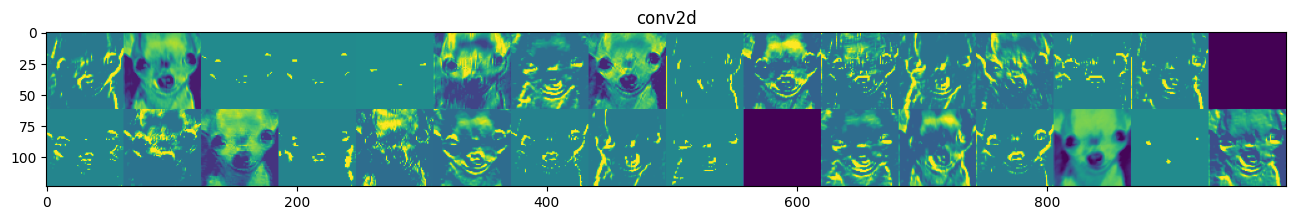

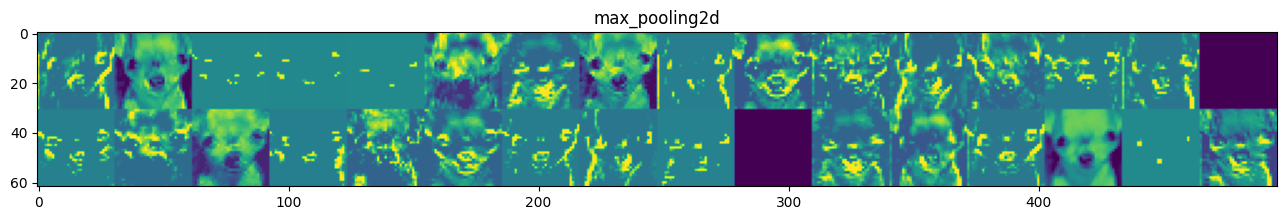

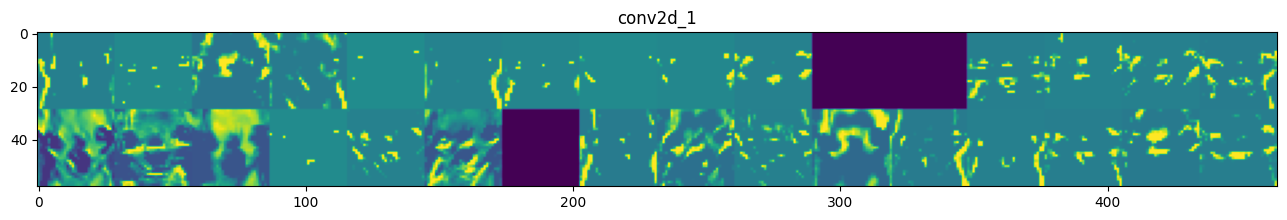

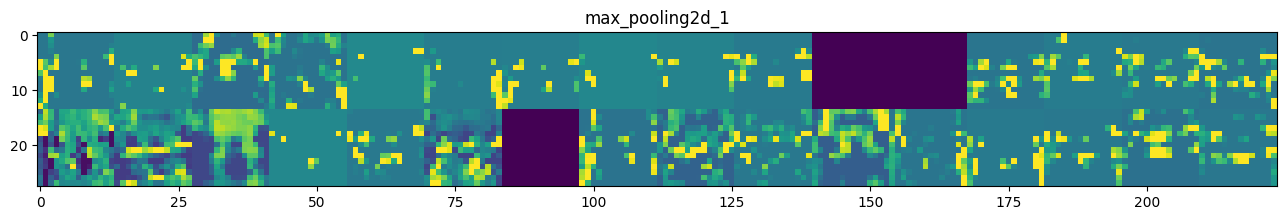

In [29]:
layer_outputs = [layer.output for layer in model.layers[0:7]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

import cv2
#read our live_test_draw
img_live = cv2.imread("Muffin_vs_chihua/Chihuahua_test2.png")
gray_img = cv2.cvtColor(img_live, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(gray_img, (64, 64))

plt.imshow(gray_img,cmap="gray")
img_final = (resized_img.reshape(1,64,64,3))/255
activations = activation_model.predict(img_final)

#display kernel outputs
layer_names = []
for layer in model.layers[0:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')

In [17]:
resized_img.shape

(100, 100, 3)